In [1]:
# Data Preprocessing

In [2]:
#!pip install -r requirements.txt

установка всех пакетов данных

In [3]:
#!pip install numpy
#!pip install matplotlib
#!pip install pandas

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
# Importing the dataset
df = pd.read_csv('kr1.csv', sep=';')

In [6]:
df.shape

(69, 14)

In [7]:
df.head (15)

,HumanFlow,Floor,Number_of_employees_in_the_state,Type,NumberOfReviewInGoogle,NumberOfChecksPerMonth,The_average_number_of_units_in_the_check,AverageIncomeOfThePopulation,The_total_area_is_sq.m.,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread
0,5211.0,1,2,Light,NaN,1230,"1,56",15610.0,9,1,1,0,0,1
1,2424.0,1,2,Light,8.0,2715,"2,03",12600.0,30,1,1,1,0,0
2,3868.0,1,2,light,NaN,878,"1,81",12600.0,15,1,1,0,1,1
3,4546.0,1,2,light,NaN,2346,"2,18",13930.0,20,1,1,0,0,1
4,3244.0,1,2,light,NaN,2542,"1,63",16030.0,30,0,0,0,0,0
5,2560.0,1,2,Light,9.0,5478,"1,75",12320.0,"57,7",0,0,0,0,1
6,1842.0,1,4,Light,21.0,9115,"2,07",16100.0,50,0,0,0,1,0
7,412.0,1,6,Light,325.0,14777,"2,24",12180.0,45,0,0,0,0,1
8,233.0,1,2,Light,NaN,2734,"1,78",13930.0,27,0,0,0,0,0
9,978.0,1,2,Light,17.0,6322,"1,76",14560.0,"54,5",0,0,0,1,0


Итак мы загрузили датасет. Он содержит в себе набор метрик, которые по всей видимости содержат описание магазинов. Чтобы более детально разобраться с данными и выбрать соответсвующую задачу для анализу - разберем подробно каждую переменную.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   HumanFlow                                 64 non-null     float64
 1   Floor                                     69 non-null     int64  
 2   Number_of_employees_in_the_state          69 non-null     int64  
 3   Type                                      69 non-null     object 
 4   NumberOfReviewInGoogle                    39 non-null     float64
 5   NumberOfChecksPerMonth                    69 non-null     int64  
 6   The_average_number_of_units_in_the_check  62 non-null     object 
 7   AverageIncomeOfThePopulation              64 non-null     float64
 8   The_total_area_is_sq.m.                   69 non-null     object 
 9   Stop_GT                                   69 non-null     int64  
 10  Stop_GT_at_home                         

Следует заметить, что название каждой переменной были переведенны на английский, поскольку при загрузке датасеты получена "UTF-8" ошибка.

Переменные типа FLOAT:

    1. Human flow - поток людей. Логично предположить, что чем популярнее магазин, тем больший поток людей он содержит
    2. Number of reviews in Google - количество отзывов в гугле. В эпоху цифровых технологий отзывы в интернете играют большую роль. Соответственно хорошая репутация привлекает большее число посетителей.
    3. Average income of the population  - средний доход населения. Логично, что чем выше доход, тем выше возможность у людей что-либо покупать и тратить больше денег в магазине.

Переменные типа INT: 
    
    1. Floor - этаж. По статистике, магазины, которые располагаются выше 1-2 этажа имеют меньшую посещаемость (если, конечно, нет лифта в помещении), чем магазины первой категории (банально, люди пожилого возраста не захотят так высоко подниматься)
    2. Number of employees in the state - количество сотрудников в штате. Магазин, который имеет достаточное количество сотрудников вызывает большу привлекательность. Человеку не придется ждать консультации, кассы не будут простаиваться из-за недостатка кассиров и т.д.
    3. Number of checks per month - Количество чеков в месяц. Чем больше посетителей, тем больше чеков (а значит и больше популярность магазина).
    4. Stop GT - остановка городского транспорта. Логично, что если у магазина есть остановка, то туда проще добраться и соответсвенно больше поток людей.
    5. Stop GT at home - остановка домой. Если у человека будет возможность уехать с этого магазина домой, то больший шанс, что он выберет именно этот магазин.
    6. The final stop of the GT - конечная остановка ГТ. По статистике конечная остановка транспорта находится где-то на окраине города. Соответственно поток людей там будет меньше. Например, в Харькове возьмем условный "Metro" в районе аэропорта или "Класс" на Клочковской в самом центре. Естественно поток людей во втором магазине будет выше.
    7. Crosswalk - пешеходный переход. Показатель, который от части делает магазин доступнее. Соответсвенно наличие показателя может увеличить поток людей.
    8. Specialized bread - специализированный хлеб. "Изюминка" магазина делает его более конкурентным и оставляет за собой постоянных покупателей. Опять же-таки на примере "Класса". Выпечка, которая прям с духовки и собственно приготовления ни раз хаставила вернуться меня в данный магазин.

Переменные типа OBJECT:
    
    1. Type - тип. Тип магазина зависит от глобальности покупок (в большинстве случая). Если это какой-то миннимаркет, то человек будет приобретать товары первой необходимости, а соответсвенно в супермаркетах делаются глобальные закупки.
    2. The average number of units in the check - среднее количество единиц в чеке. Чем больше единиц в чеке, тем больше популярность магазина (человек доверяет этому магазину и делает глобальнее покупки).
    3. The total area is sq.m. - площадь. Соответственно, как и тип магазина работает параметр площади. В большем магазине будут делаться более глобальные закупки.

# ЗАДАЧА

Исходя из всех предоставленных показателей лично для меня будет интересено проанализировать Human Flow. А именно понять, как предоставленные метрики, описывающие магазин с различных сторон будут влиять на количество людей в нем.

# Visualization

Для каждой количественной переменной построим диаграммы.Визуализация данных покажет их распределения и можно будет сделать первичный вывод о наличии/отсутвии выбросов в переменной. Поскольку количество предикторов не велико - можно вывести диаграмму для каждого отдельно.

<AxesSubplot:ylabel='Frequency'>

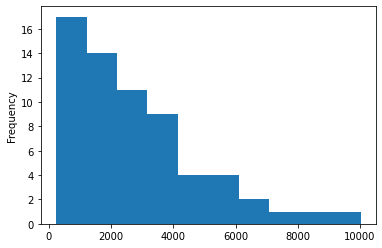

In [9]:
# Feature distribution
df['HumanFlow'].plot(kind = 'hist')

Сразу видно, что переменная распределена не по нормальному закону. Наблюдается небольшой хвост. Следует в дальнейшем проверить ее на выбросы.

<AxesSubplot:ylabel='Frequency'>

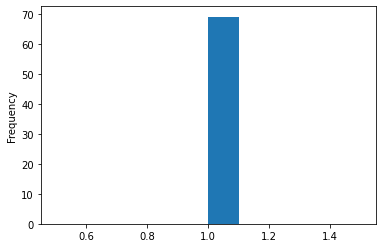

In [10]:
# Feature distribution
df['Floor'].plot(kind = 'hist')

Переменная оказалась не вариативная, все магазины распологаются на 1-ом этаже. Следовательно она не несет нужной информации для дальнейшей работы и ее следует удалить с датасета.

<AxesSubplot:ylabel='Frequency'>

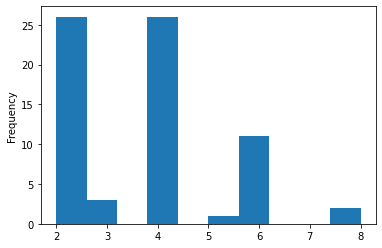

In [11]:
# Feature distribution
df['Number_of_employees_in_the_state'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

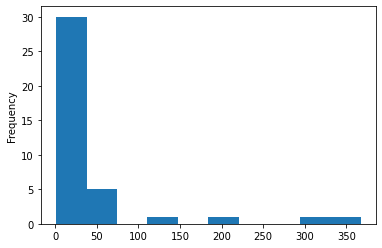

In [12]:
# Feature distribution
df['NumberOfReviewInGoogle'].plot(kind = 'hist')

Также видим, что есть хвост, который похож на выброс

<AxesSubplot:ylabel='Frequency'>

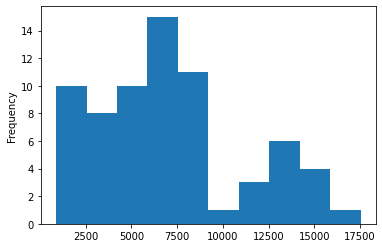

In [13]:
# Feature distribution
df['NumberOfChecksPerMonth'].plot(kind = 'hist')

<AxesSubplot:ylabel='Frequency'>

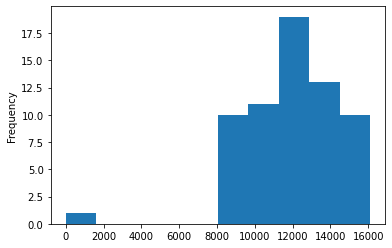

In [14]:
# Feature distribution
df['AverageIncomeOfThePopulation'].plot(kind = 'hist')

Явно есть выбросы, на которые стоить обратить внимание

# Statistics

In [15]:

# Dataset Statistics
df.describe()

,HumanFlow,Floor,Number_of_employees_in_the_state,NumberOfReviewInGoogle,NumberOfChecksPerMonth,AverageIncomeOfThePopulation,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread
count,64.000000,69.0,69.000000,39.000000,69.000000,64.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,2755.765625,1.0,3.652174,42.820513,7105.028986,11990.421875,0.362319,0.275362,0.086957,0.333333,0.318841
std,2058.993750,0.0,1.607209,81.975565,4052.584212,2570.309158,0.484192,0.449969,0.283836,0.474858,0.469441
min,233.000000,1.0,2.000000,1.000000,878.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1148.500000,1.0,2.000000,5.000000,3734.000000,10850.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2208.000000,1.0,4.000000,12.000000,6694.000000,12250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3998.750000,1.0,4.000000,33.000000,8548.000000,13492.500000,1.000000,1.000000,0.000000,1.000000,1.000000
max,10016.000000,1.0,8.000000,367.000000,17537.000000,16100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Описательная статистика выводит только количественные переменные. Соответсвенно в модели их 11. Переменная Human_flow, Number of reviews in Google, Average income of the population имеет пропуски. А так же есть переменные, которые содержит значения, выходящие за 3 сигма.

# Mistakes

In [16]:
# Mistakes Deleting 
df = df.drop(df[df.HumanFlow < 200].index)
df = df.drop(df[df.HumanFlow> 3800].index)
df.describe()

,HumanFlow,Floor,Number_of_employees_in_the_state,NumberOfReviewInGoogle,NumberOfChecksPerMonth,AverageIncomeOfThePopulation,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread
count,44.000000,49.0,49.000000,28.00000,49.000000,44.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,1610.227273,1.0,3.510204,41.50000,6870.775510,11656.068182,0.285714,0.163265,0.081633,0.306122,0.265306
std,794.378765,0.0,1.445142,71.95549,3898.338494,2707.619605,0.456435,0.373438,0.276642,0.465657,0.446071
min,233.000000,1.0,2.000000,1.00000,1296.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,924.750000,1.0,2.000000,8.00000,3734.000000,10377.500000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1664.000000,1.0,4.000000,15.00000,6332.000000,11690.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2213.250000,1.0,4.000000,35.00000,8168.000000,13195.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3244.000000,1.0,6.000000,325.00000,17537.000000,16100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

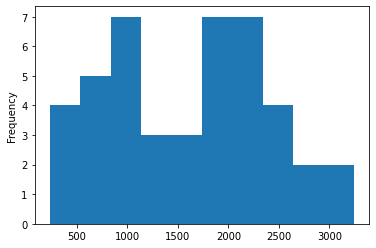

In [17]:
# Feature distribution
df['HumanFlow'].plot(kind = 'hist')

Хвост был убран, распределение в большей мере стало похоже на нормальное. Аналогично сделаем с другими переменными.

In [18]:
# Mistakes Deleting 
df = df.drop(df[df.NumberOfReviewInGoogle < 0].index)
df = df.drop(df[df.NumberOfReviewInGoogle > 110].index)
df.describe()

,HumanFlow,Floor,Number_of_employees_in_the_state,NumberOfReviewInGoogle,NumberOfChecksPerMonth,AverageIncomeOfThePopulation,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread
count,41.000000,46.0,46.000000,25.000000,46.000000,41.000000,46.000000,46.000000,46.000000,46.000000,46.000000
mean,1620.975610,1.0,3.347826,19.400000,6435.630435,11650.170732,0.282609,0.152174,0.086957,0.304348,0.239130
std,795.434268,0.0,1.336952,17.682383,3588.793226,2756.483211,0.455243,0.363158,0.284885,0.465215,0.431266
min,233.000000,1.0,2.000000,1.000000,1296.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,931.000000,1.0,2.000000,8.000000,3722.000000,10430.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1586.000000,1.0,4.000000,12.000000,6128.000000,11550.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2220.000000,1.0,4.000000,28.000000,7706.500000,13160.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,3244.000000,1.0,6.000000,64.000000,17537.000000,16100.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

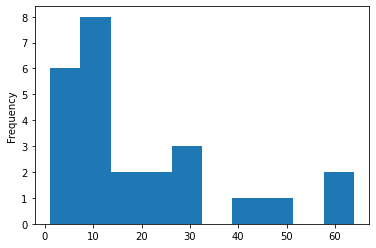

In [19]:
# Feature distribution
df['NumberOfReviewInGoogle'].plot(kind = 'hist')

In [20]:
# Mistakes Deleting 
df = df.drop(df[df.AverageIncomeOfThePopulation < 8000].index)
df = df.drop(df[df.AverageIncomeOfThePopulation > 16000].index)
df.describe()

,HumanFlow,Floor,Number_of_employees_in_the_state,NumberOfReviewInGoogle,NumberOfChecksPerMonth,AverageIncomeOfThePopulation,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread
count,38.000000,43.0,43.000000,23.000000,43.000000,38.000000,43.00000,43.000000,43.000000,43.000000,43.000000
mean,1592.131579,1.0,3.348837,19.608696,6451.930233,11724.394737,0.27907,0.139535,0.069767,0.302326,0.232558
std,771.703702,0.0,1.360737,18.413777,3641.560056,1867.273450,0.45385,0.350605,0.257770,0.464701,0.427463
min,233.000000,1.0,2.000000,1.000000,1296.000000,8120.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,942.750000,1.0,2.000000,6.500000,3726.000000,10570.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1571.500000,1.0,4.000000,12.000000,5934.000000,11515.000000,0.00000,0.000000,0.000000,0.000000,0.000000
75%,2216.250000,1.0,4.000000,28.000000,7615.000000,13037.500000,1.00000,0.000000,0.000000,1.000000,0.000000
max,3206.000000,1.0,6.000000,64.000000,17537.000000,15120.000000,1.00000,1.000000,1.000000,1.000000,1.000000


<AxesSubplot:ylabel='Frequency'>

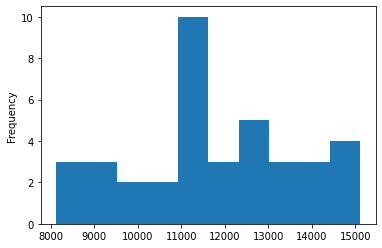

In [21]:
# Feature distribution
df['AverageIncomeOfThePopulation'].plot(kind = 'hist')

# Missing data

In [22]:
# Cheking Missing data
df.isnull().sum()

HumanFlow                                    5
Floor                                        0
Number_of_employees_in_the_state             0
Type                                         0
NumberOfReviewInGoogle                      20
NumberOfChecksPerMonth                       0
The_average_number_of_units_in_the_check     6
AverageIncomeOfThePopulation                 5
The_total_area_is_sq.m.                      0
Stop_GT                                      0
Stop_GT_at_home                              0
The_final_stop_of_the_GT                     0
Crosswalk                                    0
Specialized_bread                            0
dtype: int64

In [23]:
df.shape

(43, 14)

In [24]:
#!pip install sklearn

In [25]:
# Taking care of missing data
dfm = df

from sklearn.impute import SimpleImputer
#numeric
'''SimpleImputer - класс
imputer_mean - экземпляр
fit - метод класса'''


imputer_freq = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['HumanFlow']] = imputer_freq.fit_transform(dfm[['HumanFlow']])

imputer_freq = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['NumberOfReviewInGoogle']] = imputer_freq.fit_transform(dfm[['NumberOfReviewInGoogle']])

imputer_freq = SimpleImputer(missing_values=np.nan, strategy='mean')
dfm[['AverageIncomeOfThePopulation']] = imputer_freq.fit_transform(dfm[['AverageIncomeOfThePopulation']])

imputer_freq = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
dfm[['The_average_number_of_units_in_the_check']] = imputer_freq.fit_transform(dfm[['The_average_number_of_units_in_the_check']])

In [26]:
# Cheking Missing data

dfm.isnull().sum()

HumanFlow                                   0
Floor                                       0
Number_of_employees_in_the_state            0
Type                                        0
NumberOfReviewInGoogle                      0
NumberOfChecksPerMonth                      0
The_average_number_of_units_in_the_check    0
AverageIncomeOfThePopulation                0
The_total_area_is_sq.m.                     0
Stop_GT                                     0
Stop_GT_at_home                             0
The_final_stop_of_the_GT                    0
Crosswalk                                   0
Specialized_bread                           0
dtype: int64

In [27]:
dfm.shape

(43, 14)

Все пропуски были заполнены. Предварительно из модели удалены значения, которые выходили за 3 сигма и после этого некоторые переменные можно было заполнить средними показателями (например, Number_of_reviews_in_Google)

# Outliers

In [28]:
# Outliers
HumanFlow = []
for hf in dfm['HumanFlow']:
    if hf > round(dfm['HumanFlow'].mean() + 3*dfm['HumanFlow'].std()):
        hf = round(dfm['HumanFlow'].mean() + 3*dfm['HumanFlow'].std()) 
    HumanFlow.append(hf)
dfm['HumanFlow'] = HumanFlow

In [29]:
dfm['HumanFlow'].describe()

count      43.000000
mean     1592.131579
std       724.313868
min       233.000000
25%      1045.000000
50%      1592.131579
75%      2179.000000
max      3206.000000
Name: HumanFlow, dtype: float64

In [30]:
# Outliers
NumberOfChecksPerMonth = []
for num in dfm['NumberOfChecksPerMonth']:
    if num > round(dfm['NumberOfChecksPerMonth'].mean() + 3*dfm['NumberOfChecksPerMonth'].std()):
        num = round(dfm['NumberOfChecksPerMonth'].mean() + 3*dfm['NumberOfChecksPerMonth'].std()) 
    NumberOfChecksPerMonth.append(num)
dfm['NumberOfChecksPerMonth'] = NumberOfChecksPerMonth

In [31]:
dfm.describe()

,HumanFlow,Floor,Number_of_employees_in_the_state,NumberOfReviewInGoogle,NumberOfChecksPerMonth,AverageIncomeOfThePopulation,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread
count,43.000000,43.0,43.000000,43.000000,43.000000,43.000000,43.00000,43.000000,43.000000,43.000000,43.000000
mean,1592.131579,1.0,3.348837,19.608696,6448.209302,11724.394737,0.27907,0.139535,0.069767,0.302326,0.232558
std,724.313868,0.0,1.360737,13.326914,3630.027178,1752.605374,0.45385,0.350605,0.257770,0.464701,0.427463
min,233.000000,1.0,2.000000,1.000000,1296.000000,8120.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1045.000000,1.0,2.000000,11.500000,3726.000000,11025.000000,0.00000,0.000000,0.000000,0.000000,0.000000
50%,1592.131579,1.0,4.000000,19.608696,5934.000000,11724.394737,0.00000,0.000000,0.000000,0.000000,0.000000
75%,2179.000000,1.0,4.000000,19.608696,7615.000000,12635.000000,1.00000,0.000000,0.000000,1.000000,0.000000
max,3206.000000,1.0,6.000000,64.000000,17377.000000,15120.000000,1.00000,1.000000,1.000000,1.000000,1.000000


Таким образом удалены выбросы в переменных, в которых было соответствующее подозрение.

# Log

In [32]:
#!pip install seaborn

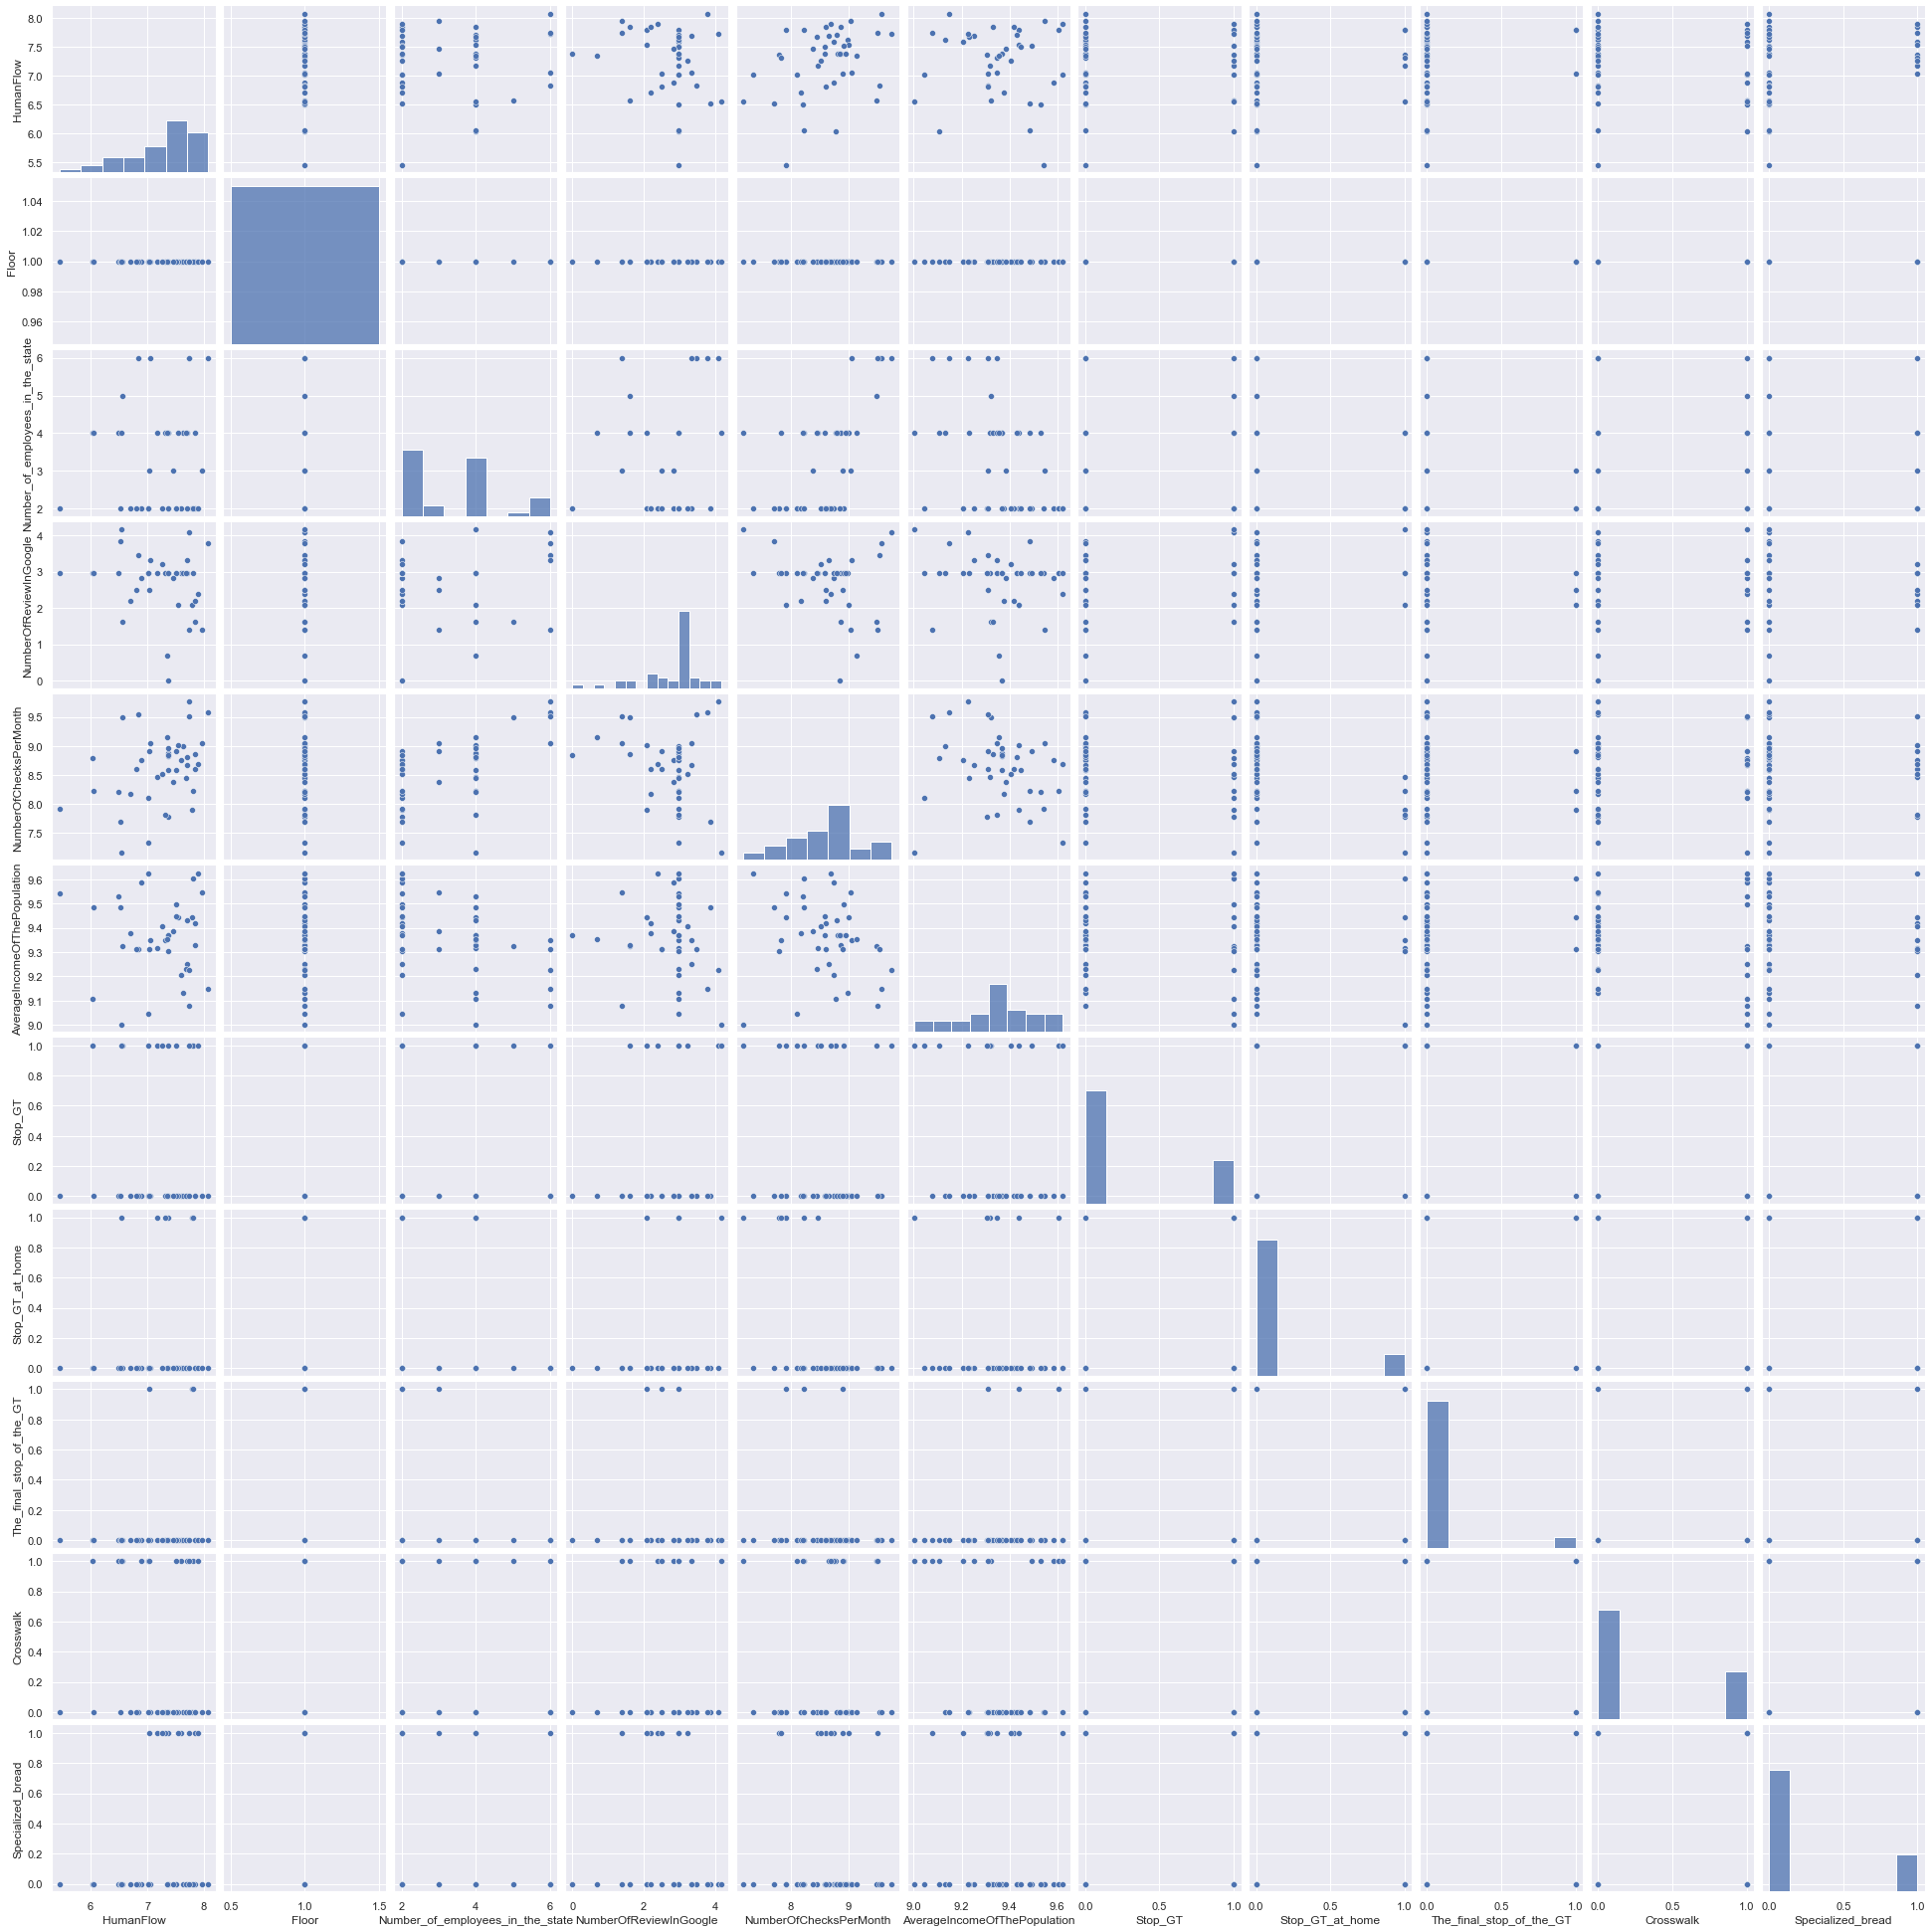

In [33]:
# Log Transformations for Skewed Distributions
dfm[['NumberOfChecksPerMonth', 'NumberOfReviewInGoogle','HumanFlow','AverageIncomeOfThePopulation']] =np.log(dfm[['NumberOfChecksPerMonth','NumberOfReviewInGoogle', 'HumanFlow', 'AverageIncomeOfThePopulation']])

import seaborn as sns
sns.set()
sns.pairplot(dfm)

Поскольку переменные не в сопоставимом интервале принято решение их прологарифмировать для дальнейшей работы.

In [34]:
# Function Encoding
def encoding_char(x):
    char_var = list(set(x.columns) - set(x._get_numeric_data().columns))
    for col_names in char_var:
        f = pd.factorize(x[col_names])
        x[col_names] = pd.factorize(x[col_names])[0]
    return(x)

In [35]:
dfm.shape

(43, 14)

In [36]:
# Encoding categorical data
dfm = encoding_char(dfm)
dfm.head (10)

,HumanFlow,Floor,Number_of_employees_in_the_state,Type,NumberOfReviewInGoogle,NumberOfChecksPerMonth,The_average_number_of_units_in_the_check,AverageIncomeOfThePopulation,The_total_area_is_sq.m.,Stop_GT,Stop_GT_at_home,The_final_stop_of_the_GT,Crosswalk,Specialized_bread
1,7.793174,1,2,0,2.079442,7.906547,0,9.441452,0,1,1,1,0,0
5,7.847763,1,2,0,2.197225,8.608495,1,9.418979,1,0,0,0,0,1
8,5.451038,1,2,0,2.975973,7.913521,2,9.541800,2,0,0,0,0,0
9,6.885510,1,2,0,2.833213,8.751791,3,9.586033,3,0,0,0,1,0
11,6.566672,1,5,1,1.609438,9.486608,4,9.323669,4,1,0,0,1,0
12,6.040255,1,4,1,2.975973,8.785540,5,9.108308,5,1,0,0,1,0
16,7.586296,1,2,2,2.975973,8.753371,6,9.204322,6,0,0,0,1,1
17,7.167038,1,4,2,2.975973,8.465900,7,9.317399,7,1,1,0,0,1
18,7.372829,1,4,0,2.975973,8.821437,6,9.369427,8,0,0,0,0,0
19,7.013915,1,2,0,2.975973,8.110427,8,9.044286,9,1,0,0,1,0


# Correlations

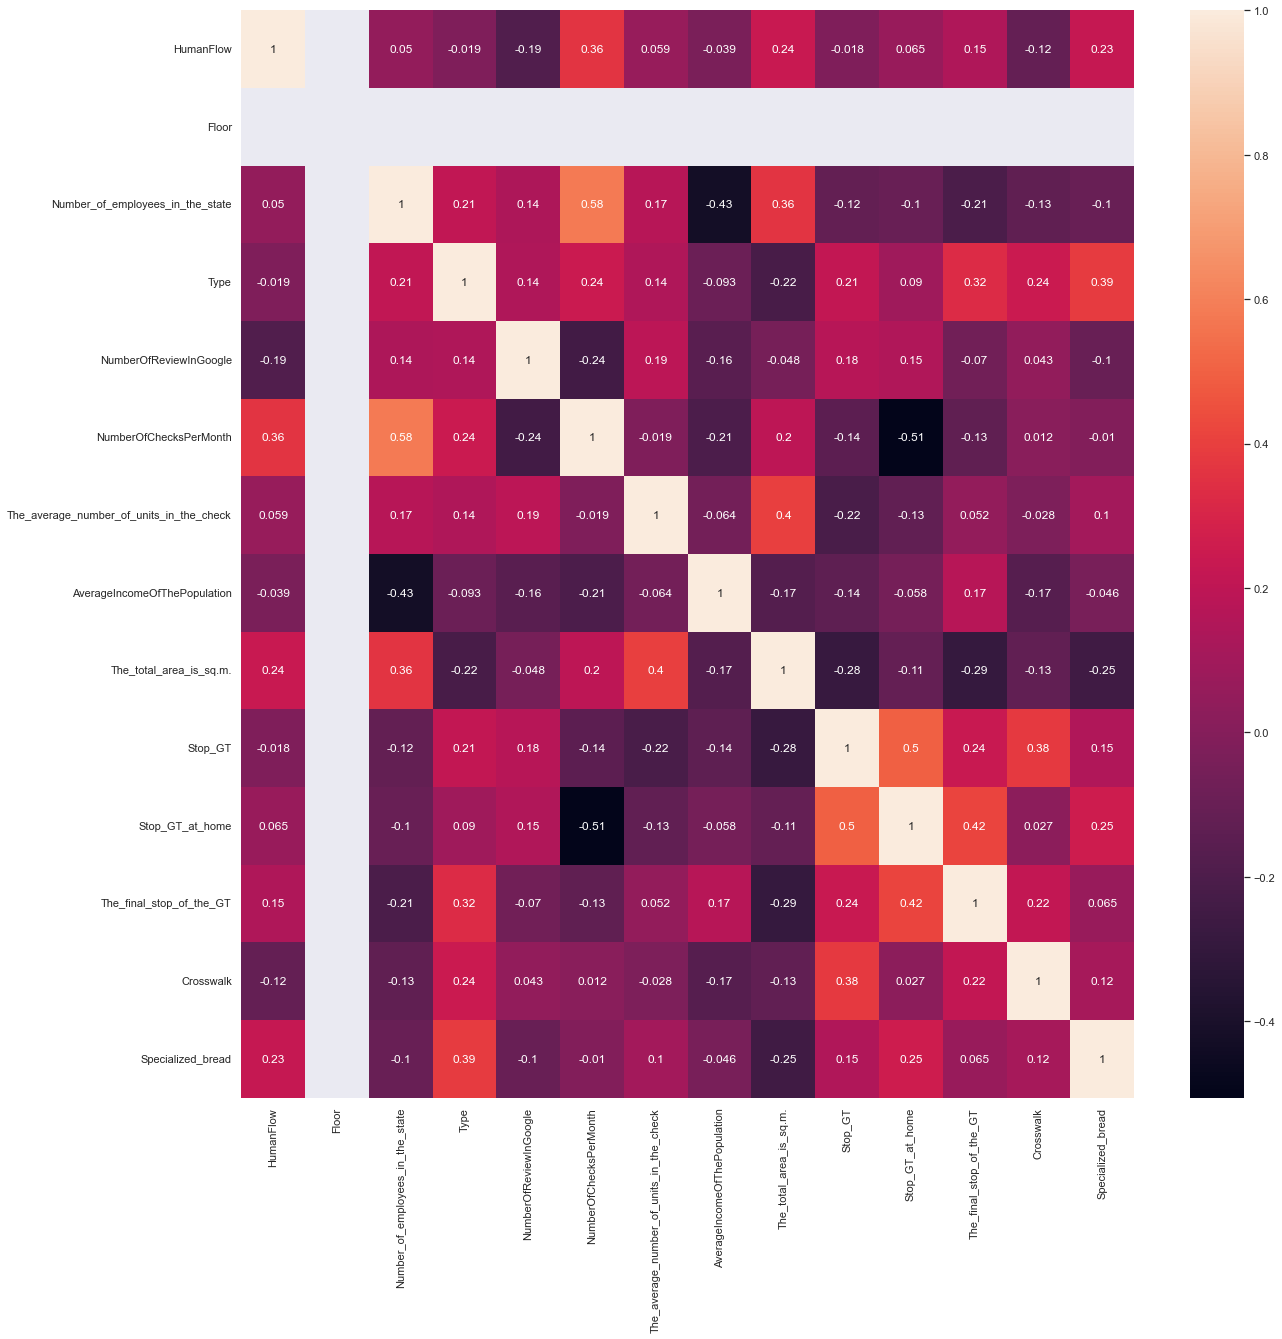

In [37]:
# Cheking correlations
import seaborn as sns
corrmat = dfm.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()


In [38]:

# Removing Correlated Data
dfr = dfm.drop(['Floor','Number_of_employees_in_the_state'], axis='columns', inplace=False)
dfr.shape

(43, 12)

In [39]:

# Removing Correlated Data
dfr1 = dfm.drop(['Floor','Type','NumberOfReviewInGoogle','The_average_number_of_units_in_the_check','AverageIncomeOfThePopulation','Stop_GT','Stop_GT_at_home','The_final_stop_of_the_GT','Crosswalk','Number_of_employees_in_the_state'], axis='columns', inplace=False)
dfr.shape

(43, 12)

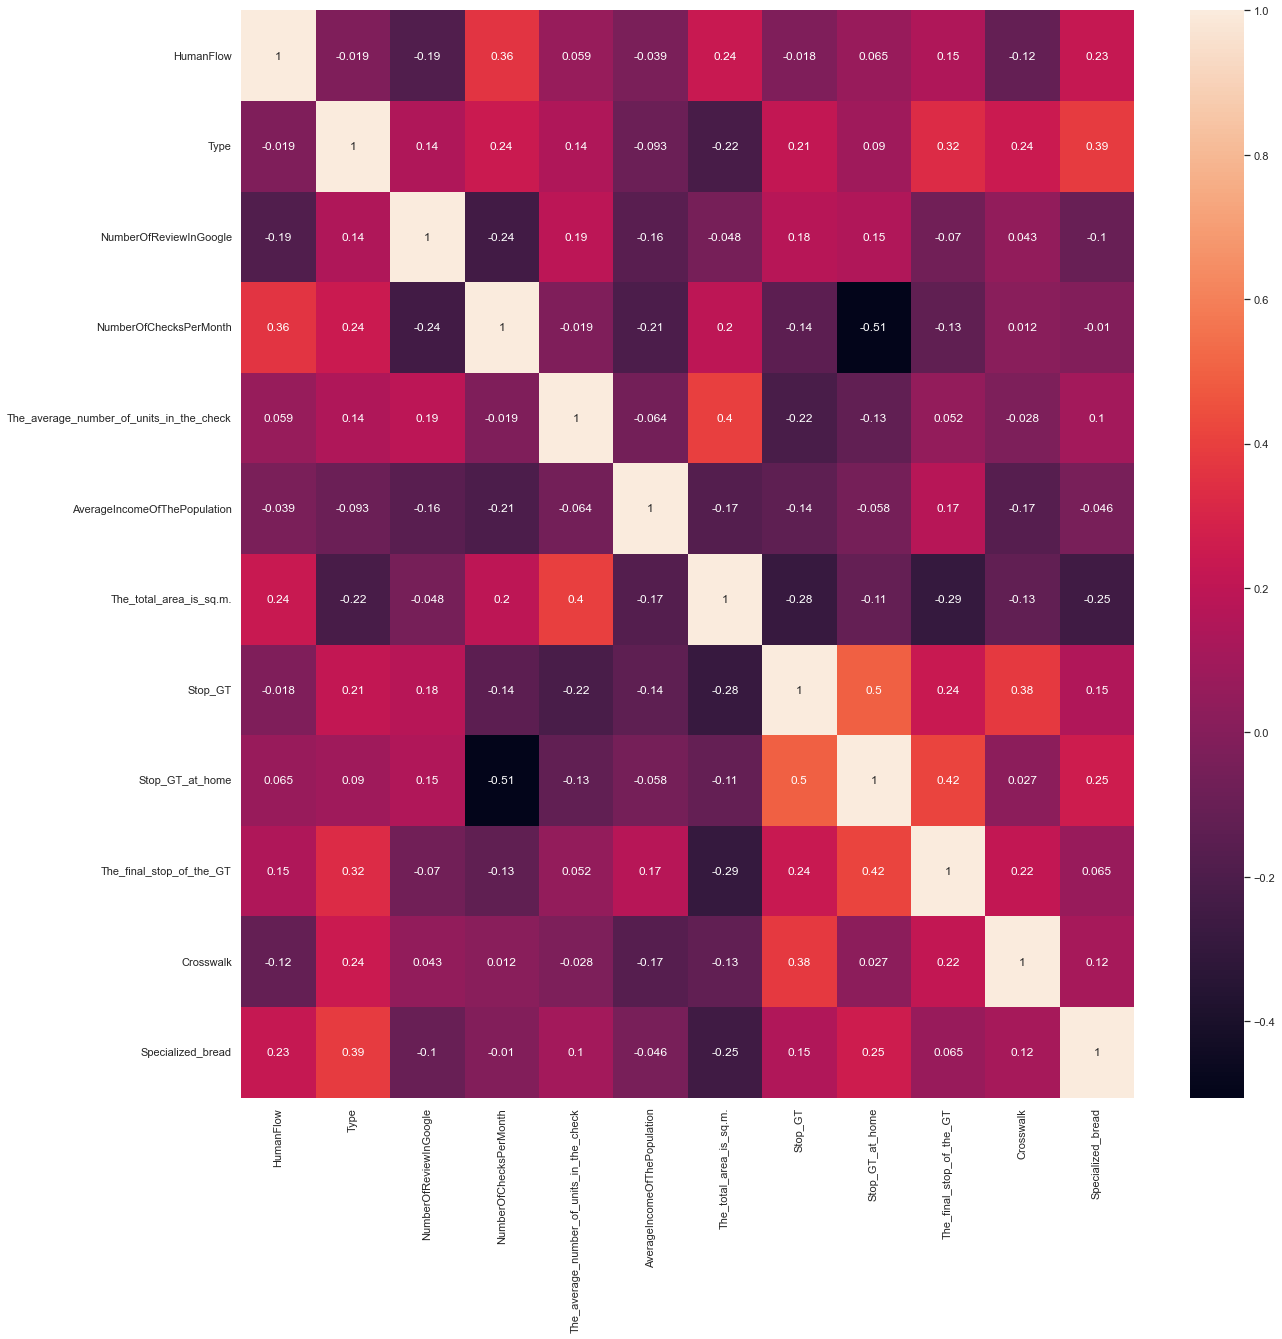

In [40]:
# Cheking correlations
import seaborn as sns
corrmat = dfr.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, annot=True)
plt.show()

Из датасета удалены 2 переменные - Floor (не несет информативности в себе) и Number_of_employees_in_the_state поскольку сильно коррелирует с другой переменной, но имеет меньшее влияние на У. 

In [45]:

# Exporting the dataset
dfr.to_csv('kr_1.csv', sep=';', index=False)

In [46]:

# Exporting the dataset
dfr1.to_csv('krdop.csv', sep=';', index=False)